In [34]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import json
import glob
from  scipy import ndimage

In [3]:
df = pd.read_csv('df.csv')

In [4]:
df

,imagename,file,parentId,text,fontFamily,fontSize,fontStyle,fontWeight,h,w,Id
0,1_cefabe1b,1_cefabe1b.png,1_cefabe1b.png,ห้างหุ้นส่วน พรชนก แอร์ อิเลคทริค\nPhonchnk Ae...,TH_Charm_of_AU,16px,italic,bold,62.016041,284.935888,1
1,1_7bfac6b8,1_7bfac6b8.png,1_7bfac6b8.png,>ใบรับเงิน\ninvoice,FC_Knomphing_Regular,16px,normal,bold,15.328125,82.933795,1
2,1_a368ca3e,1_a368ca3e.png,1_a368ca3e.png,ห้างหุ้นส่วน พรชนก แอร์ อิเลคทริค\nPhonchnk Ae...,TH_Charm_of_AU,16px,italic,bold,62.016041,284.935888,1
3,1_4a016af7,1_4a016af7.png,1_4a016af7.png,วันที่: 8 พฤศจิกายน 2563\nDate:,fonttintin,16px,normal,bold,26.332747,266.339428,1
4,1_738a6f5e,1_738a6f5e.png,1_738a6f5e.png,เลขที่: 04277838\nINVOICE NO.: 04277838,fonttintin,16px,normal,bold,53.408681,283.485375,1
...,...,...,...,...,...,...,...,...,...,...,...
153940,999_22cdf859,999_22cdf859.png,999_22cdf859.png,77.40,TH_Sarabun,20px,italic,bold,16.037682,48.486448,999
153941,999_7c433fb5,999_7c433fb5.png,999_7c433fb5.png,รวมเงิน\nSub total,TH_Sarabun,22px,italic,normal,20.228999,163.032750,999
153942,999_3c33ea57,999_3c33ea57.png,999_3c33ea57.png,77.40,TH_Sarabun,22px,italic,normal,16.467000,52.690594,999
153943,999_6ad59b3,999_6ad59b3.png,999_6ad59b3.png,เปอร์เซ็นส่วนลด\nDiscount percent,TH_Sarabun,22px,italic,normal,28.215001,319.488938,999


In [5]:
font_fam = list(np.unique(df['fontFamily']))

In [6]:
font_fam

['Angsana_New',
 'Cordia_New',
 'DM_Shining_Star_Regular',
 'FC_Knomphing_Regular',
 'Kunlasatri',
 'TH_Chakra_Petch',
 'TH_Charm_of_AU',
 'TH_Mali_Grade6',
 'TH_Sarabun',
 'fonttintin']

In [92]:
# y,x = img_thres.shape
# freq_ = []
# for i in range(y):
#     x = img_thres[i] == 255
#     len_ = np.count_nonzero(x)
#     freq_.append(len_)

# import math
# y_ = [i for i in range(y)]
# yint = range(min(y_), math.ceil(max(y_))+1)
# plt.yticks(yint)

# plt.plot(freq_, y_)

In [188]:
# y,x = img_thres_2.shape
# freq_ = []
# for i in range(y):
#     x = img_thres_2[i] == 255
#     len_ = np.count_nonzero(x)
#     freq_.append(len_)


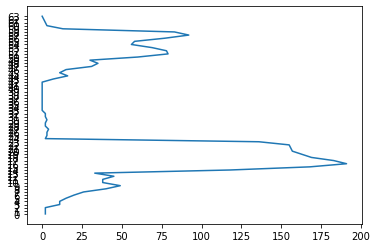

In [189]:
# y_ = [i for i in range(y)]
# yint = range(min(y_), math.ceil(max(y_))+1)
# plt.yticks(yint)

# plt.plot(freq_, y_)
# plt.savefig('ori_2_line.png')

[  2   2   2  11  11  15  21  26  41  50  39  38  44  33 118 168 191 185
 170 163 158 157 157 136   3   3   3   4   2   2   3   2   2   0   0   0
   0   0   0   0   0   0   0   7  16  12  15  31  35  30  60  79  78  69
  56  58  77  92  83  13   3   2   1   0]


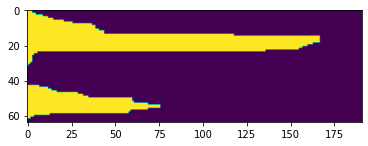

In [190]:
# img_2 = cv2.imread('crop_images\\1_cefabe1b.png',0)
# # gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
# img_thres_2 = cv2.adaptiveThreshold(img_2, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
# plt.imshow(img_thres_2)

# # im = cv2.imread('/content/image/0_0.png',0)
# # im = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)

# im = img_thres_2+1
# im_sum = np.sum(im, axis=1).astype('int32')
# print(im_sum)


# zero = np.zeros((max(im_sum), len(im_sum)), dtype = 'uint8') 
# for k,i in enumerate(im_sum): zero[:,k] = np.concatenate((np.zeros(int((zero.shape[0] - i)), dtype = 'uint8'), np.ones((i), dtype = 'uint8')), axis=0)
# zero = zero.T
# zero_t = zero[:, ::-1]
# zero_t = cv2.medianBlur(zero_t,7)
# plt.imshow(zero_t)


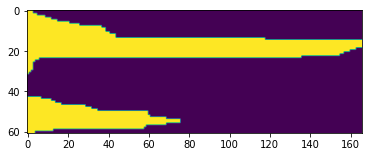

In [191]:
# y, x = np.where(zero_t == 1)
# img_crop = zero_t[min(y):max(y), :max(x)]
# plt.imshow(zero_t[min(y):max(y), :max(x)])

In [364]:
img_path  = os.path.join('crop_images', "592_b22ee77b.png")
img_2 = cv2.imread(img_path,0)

In [36]:
def size_img(img_name, key):
    font_fam = key.split('-')[0]
    font_size = key.split('-')[1]
    # img_1 = plt.imread(img_path,0)
    # print(img_1)
    img_path = f"train_fontSize\\{font_size}\\{img_name}.png"
    img_2 = cv2.imread(img_path,0)
    # print(img_2)
    img_thres_2 = cv2.adaptiveThreshold(img_2, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
    im = img_thres_2+1
    im_sum = np.sum(im, axis=1).astype('int32')
    result = ndimage.median_filter(im_sum, size=17)
    diff = np.diff(result)
    # print(diff)
    try:
        index_ = np.where((diff == np.min(diff)) & (diff < -5) )
    except:
        return None
    try:
        for i,v in enumerate(diff[:index_[0][0]+1]):
            if v !=0:
                start = i
                (height,width) = img_2[start:index_[0][0]+1, :].shape
                # print(height)
                return height
    except:
        (height, width) = img_2.shape
        return height

In [ ]:
def predict(img_path, font_family):
    img_path = f"train_fontSize\\{font_size}\\{img_name}.png"
    img_2 = cv2.imread(img_path,0)
    # print(img_2)
    img_thres_2 = cv2.adaptiveThreshold(img_2, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
    im = img_thres_2+1
    im_sum = np.sum(im, axis=1).astype('int32')
    result = ndimage.median_filter(im_sum, size=17)
    diff = np.diff(result)
    try:
        index_ = np.where((diff == np.min(diff)) & (diff < -5) )
    except:
        return None
    try:
        for i,v in enumerate(diff[:index_[0][0]+1]):
            if v !=0:
                start = i
                (height,width) = img_2[start:index_[0][0]+1, :].shape
                
                return height
    except:
        (height, width) = img_2.shape
        return height

In [26]:
train_crop_list = glob.glob('train_fontSize\*\*')

In [27]:
df_train = pd.DataFrame(train_crop_list).rename(columns={0:'path'}).reset_index()
df_train[['path','fontSize','file']] = df_train['path'].str.split("\\",expand=True)
df_train = df_train.merge(df, how='left', on=['file'])

In [28]:
df_train

,index,path,fontSize_x,file,imagename,parentId,text,fontFamily,fontSize_y,fontStyle,fontWeight,h,w,Id
0,0,train_fontSize,12px,1000_1167919b.png,1000_1167919b,1000_1167919b.png,Address,TH_Charm_of_AU,12px,italic,normal,11.412000,38.075719,1000
1,1,train_fontSize,12px,1000_1258e0f5.png,1000_1258e0f5,1000_1258e0f5.png,โทร,TH_Charm_of_AU,12px,italic,normal,19.890000,17.468062,1000
2,2,train_fontSize,12px,1000_1d3dd337.png,1000_1d3dd337,1000_1d3dd337.png,website,TH_Charm_of_AU,12px,italic,normal,11.286000,33.973313,1000
3,3,train_fontSize,12px,1000_23719ab2.png,1000_23719ab2,1000_23719ab2.png,0 2993 3416,TH_Charm_of_AU,12px,italic,bold,9.333521,66.583872,1000
4,4,train_fontSize,12px,1000_29980775.png,1000_29980775,1000_29980775.png,Melendez@gmail.org,TH_Mali_Grade6,12px,italic,normal,11.812500,99.359619,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107757,107757,train_fontSize,24px,9_25b31ceb.png,9_25b31ceb,9_25b31ceb.png,"1,708.20",TH_Mali_Grade6,24px,normal,bold,17.650101,80.109837,9
107758,107758,train_fontSize,24px,9_640d9716.png,9_640d9716,9_640d9716.png,ห้างหุ้นส่วน ราชาแว่น,Cordia_New,24px,italic,bold,32.589844,212.549047,9
107759,107759,train_fontSize,24px,9_75398068.png,9_75398068,9_75398068.png,"69,240.80",TH_Mali_Grade6,24px,normal,bold,17.650101,96.808594,9
107760,107760,train_fontSize,24px,9_8dd102d7.png,9_8dd102d7,9_8dd102d7.png,"89,996.48",TH_Mali_Grade6,24px,normal,bold,17.586119,96.990234,9


In [38]:
font_size = list(np.unique(df['fontSize']))
font_fam = list(np.unique(df['fontFamily']))
size_result = {}
for i in font_fam:
    for j in font_size:
        key = f'{i}-{j}'
        print(key)
        # print(key)
        image_list_ = df_train[(df_train['fontFamily'] == i) & (df_train['fontSize_x'] == j)]['imagename']
        sizee = []
        for img in image_list_:
            # print('in')
            h = size_img(img, key)
            sizee.append(h)
        sizee = [s for s in sizee if s]
        avg = np.mean(sizee)
        size_result[key] = avg

Angsana_New-12px
Angsana_New-14px
Angsana_New-16px
Angsana_New-18px
Angsana_New-20px
Angsana_New-22px
Angsana_New-24px
Cordia_New-12px
Cordia_New-14px
Cordia_New-16px
Cordia_New-18px
Cordia_New-20px
Cordia_New-22px
Cordia_New-24px
DM_Shining_Star_Regular-12px
DM_Shining_Star_Regular-14px
DM_Shining_Star_Regular-16px
DM_Shining_Star_Regular-18px
DM_Shining_Star_Regular-20px
DM_Shining_Star_Regular-22px
DM_Shining_Star_Regular-24px
FC_Knomphing_Regular-12px
FC_Knomphing_Regular-14px
FC_Knomphing_Regular-16px
FC_Knomphing_Regular-18px
FC_Knomphing_Regular-20px
FC_Knomphing_Regular-22px
FC_Knomphing_Regular-24px
Kunlasatri-12px
Kunlasatri-14px
Kunlasatri-16px
Kunlasatri-18px
Kunlasatri-20px
Kunlasatri-22px
Kunlasatri-24px
TH_Chakra_Petch-12px
TH_Chakra_Petch-14px
TH_Chakra_Petch-16px
TH_Chakra_Petch-18px
TH_Chakra_Petch-20px
TH_Chakra_Petch-22px
TH_Chakra_Petch-24px
TH_Charm_of_AU-12px
TH_Charm_of_AU-14px
TH_Charm_of_AU-16px
TH_Charm_of_AU-18px
TH_Charm_of_AU-20px
TH_Charm_of_AU-22px
TH_Ch

In [40]:
# import json
# with open('size_threshold.json', 'w') as fp:
#     json.dump(size_result, fp)

In [39]:
size_result

{'Angsana_New-12px': 35.712820512820514,
 'Angsana_New-14px': 38.006057268722465,
 'Angsana_New-16px': 44.01176470588236,
 'Angsana_New-18px': 44.71333333333333,
 'Angsana_New-20px': 47.68713105076741,
 'Angsana_New-22px': 48.81455399061033,
 'Angsana_New-24px': 55.12470588235294,
 'Cordia_New-12px': 35.14859437751004,
 'Cordia_New-14px': 38.25804721030043,
 'Cordia_New-16px': 43.8603707995365,
 'Cordia_New-18px': 43.18829787234043,
 'Cordia_New-20px': 46.523693803159176,
 'Cordia_New-22px': 54.18401937046005,
 'Cordia_New-24px': 52.21921921921922,
 'DM_Shining_Star_Regular-12px': 36.222911963882616,
 'DM_Shining_Star_Regular-14px': 40.72060470324748,
 'DM_Shining_Star_Regular-16px': 45.05112699285321,
 'DM_Shining_Star_Regular-18px': 44.91961023142509,
 'DM_Shining_Star_Regular-20px': 48.57289293849659,
 'DM_Shining_Star_Regular-22px': 53.28369565217391,
 'DM_Shining_Star_Regular-24px': 54.23784355179704,
 'FC_Knomphing_Regular-12px': 33.46635883905013,
 'FC_Knomphing_Regular-14px': 3

In [35]:
image_list_

590       1011_4dc69dd9
591       1011_a21a7993
592       1011_4a34f1a0
593       1011_f3d4b5e3
594       1011_bd0cd69b
              ...      
152748     977_dfe086bb
152749      977_3a9d1e2
152750     977_6cf46bd7
152751     977_c07e8d5a
153356      988_e28a42b
Name: imagename, Length: 2506, dtype: object

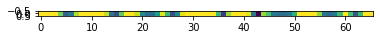

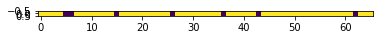

[]


In [317]:
# from scipy import ndimage, misc


# for i in img_name_list[0:1]:
#     img_path = os.path.join('crop_images', "592_b22ee77b.png")
#     img_2 = cv2.imread(img_path,0)
#     plt.imshow(img_2)
#     plt.show()
#     img_thres_2 = cv2.adaptiveThreshold(img_2, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
#     plt.imshow(img_thres_2)
#     plt.show()

#     im = img_thres_2+1
#     im_sum = np.sum(im, axis=1).astype('int32')

#     result = ndimage.median_filter(im_sum, size=17)
#     # plt.stem(result)
#     # plt.show()
#     diff = np.diff(result)
#     print(diff)
#     try:
#         index_ = np.where((diff == np.min(diff)) & (diff < -5) )
#     except:
#         break
#     try:
#         for i,v in enumerate(diff[:index_[0][0]+1]):
#             if v !=0:
#                 start = i
#                 break
    
#         plt.imshow(img_thres_2[start:index_[0][0]+1, :])
#         plt.show()
#         print('-----------')
#     except:
#         plt.imshow(img_thres_2)
#         plt.show()
#         print('-----------')
#         continue
            
            
#         # print('-----------')
#         # continue